In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

paths = [f"data/ETC/F430M/image/", f"data/ETC/F480M/image/"]

file_det = "image_detector.fits"
file_ngroups = "image_ngroups_map.fits"
file_sat = "image_saturation.fits"
file_snr = "image_snr.fits"

## Loading files in for each filter
Calculating the total flux in each image (ignoring the pixels which are saturated in 1 group).

In [2]:
# F430M
ngroups_430 = fits.open(paths[0] + file_ngroups)[0]
det_430 = fits.open(paths[0] + file_det)[0]

psf_430 = np.array(det_430.data)
total_flux_430 = np.nansum(psf_430)

# F480M
ngroups_480 = fits.open(paths[1] + file_ngroups)[0]
det_480 = fits.open(paths[1] + file_det)[0]

psf_480 = np.array(det_480.data)
total_flux_480 = np.nansum(psf_480)

## Calculating flux lost in each group
`psf * mask` gives the pixels that are lost in `i` groups. Thus `np.nansum(psf_430 * mask_430)` gives the flux lost in `i` groups. The fraction of flux lost in `i` groups is then np.`nansum(psf_430 * mask_430) / total_flux`.

In [3]:
n = 7
groups = np.arange(1, n+1)
losts_430, losts_480 = [], []

for i in groups:
    # saturation mask
    mask_430 = np.where(ngroups_430.data <= i, 1, 0)
    mask_480 = np.where(ngroups_480.data <= i, 1, 0)

    # lost flux
    lost_430 = np.nansum(psf_430 * mask_430)
    lost_480 = np.nansum(psf_480 * mask_480)

    # appending
    losts_430.append(lost_430 / total_flux_430)
    losts_480.append(lost_480 / total_flux_480)


losts_430 = np.array(losts_430)
losts_480 = np.array(losts_480)

Plotting...

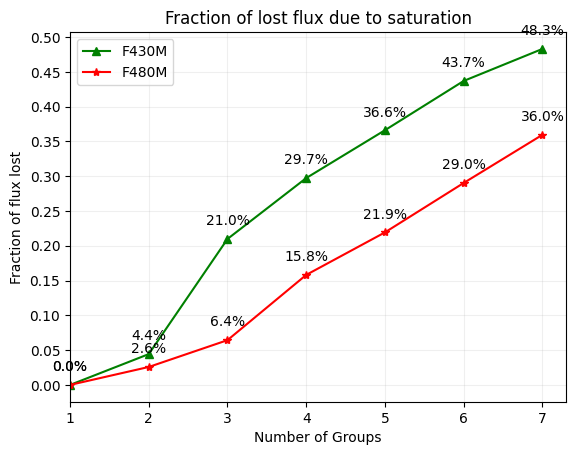

In [4]:
fig, ax = plt.subplots()
ax.plot(groups, losts_430, color='green', label="F430M", marker='^')
ax.plot(groups, losts_480, color='red', label="F480M", marker='*')
ax.set(
    title="Fraction of lost flux due to saturation",
    xlabel="Number of Groups",
    ylabel="Fraction of flux lost",
    # ylim=(0, 1),
    xlim=(1, None),
    xticks=range(1, n+1),
    yticks=np.linspace(0, 0.5, 11),
    )
# ax.axhline(1, ls='--', color='k')
ax.grid(alpha=0.2)
ax.legend()

# annotate data point values
for x, y1, y2 in zip(groups, losts_430, losts_480):
    ax.annotate(f"{100*y1:.1f}%", (x, y1), textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate(f"{100*y2:.1f}%", (x, y2), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.show()
